PRACTICAL      GROUP 7

MEMBERS: 

* Joseph Junior
* Josue Nguinabe
* Lydie Gaelle
* Nathalie Jadot
* Paule Confort

**Forecasting using Recurrent Neural** **Networks (RNN)**

In [1]:
import numpy as np # importation of library for calculus
np.random.seed(123) # generate the same random sequence 

import matplotlib.pyplot as plt #importation of graphic library
import pandas as pd # importation of data manipulation and analysis library
import math  # importation of the math module that contains all the mathematics functions

import tensorflow as tf #importation of tensorflows for probabilistic reasoning and statistical analysis
#tf.set_random_seed(1234)

import keras # importation of neural network library 
from keras.models import Sequential #choose in keras models, the sequential type of building neural network
from keras.layers import Dense #Go to the neural network layer : keras.layers and import Dense means each neuron in the dense layer receives
from keras.layers import LSTM, SimpleRNN # import LSTM and SimpleRNN from keras.layers
from sklearn.metrics import mean_squared_error # import in sklearn , the method of errors calculus
from sklearn.metrics import accuracy_score, confusion_matrix # import the two performance indicator of our future model

%matplotlib inline

In [2]:
from google.colab import files

import pandas as pd

upload = files.upload() #open the dataset in in google colab 

Saving wind_solar.csv to wind_solar.csv


In [3]:
df1 = pd.read_csv('wind_solar.csv',skiprows = 15)
df1.head(10)       #command to read the dataset by rows and columns starting by rows 15

,YEAR,MO,DY,HR,PS,WS10M,WD10M,WS50M,RH2M,PRECTOTCORR,T2M
0,2020,5,1,0,101.05,2.49,264.79,3.32,90.12,0.08,26.15
1,2020,5,1,1,100.97,2.31,260.06,3.05,90.25,0.12,26.02
2,2020,5,1,2,100.92,2.20,254.14,2.85,90.19,0.19,25.91
3,2020,5,1,3,100.90,2.23,250.36,2.88,90.00,0.19,25.87
4,2020,5,1,4,100.92,2.24,247.20,2.88,90.00,0.15,25.83
5,2020,5,1,5,100.97,2.20,244.98,2.80,90.00,0.11,25.83
6,2020,5,1,6,101.02,2.12,242.87,2.69,89.38,0.08,26.16
7,2020,5,1,7,101.08,2.11,235.55,2.49,86.25,0.07,26.94
8,2020,5,1,8,101.12,2.18,220.49,2.50,80.00,0.06,27.89
9,2020,5,1,9,101.12,2.41,210.23,2.72,74.81,0.05,28.70


In [4]:
def ReScale(data, a):
    data_avg = data.mean()
    scaled_data = a*(data - data_avg)
    return scaled_data   # creation of ReScale function to normalize the values of my dataset, normalization respect to the formula  , $ /frac{x-/mu}{/sigma} 

In [5]:
df1.columns  #define and show the differents columns of my dataser  

Index(['YEAR', 'MO', 'DY', 'HR', 'PS', 'WS10M', 'WD10M', 'WS50M', 'RH2M',
       'PRECTOTCORR', 'T2M'],
      dtype='object')

In [6]:
df =  df1[ ['PS', 'WS10M', 'WD10M', 'WS50M', 'PRECTOTCORR', 'T2M']  ] #create the dataframe with the name of each columns
df

,PS,WS10M,WD10M,WS50M,PRECTOTCORR,T2M
0,101.05,2.49,264.79,3.32,0.08,26.15
1,100.97,2.31,260.06,3.05,0.12,26.02
2,100.92,2.20,254.14,2.85,0.19,25.91
3,100.90,2.23,250.36,2.88,0.19,25.87
4,100.92,2.24,247.20,2.88,0.15,25.83
...,...,...,...,...,...,...
2203,101.02,3.87,202.53,5.43,0.00,23.66
2204,101.09,3.96,201.30,5.52,0.00,23.57
2205,101.14,3.96,200.44,5.54,0.00,23.50
2206,101.14,3.96,200.19,5.56,0.00,23.46


In [7]:
df2 = ReScale(df , 0.5) # normalize the data by taking a=0.5
#df2.drop(['WD10M' , 'PS' ] , axis = 1 , inplace  =  True)
df2.head()  #show the fifht rows of the dataset

,PS,WS10M,WD10M,WS50M,PRECTOTCORR,T2M
0,0.061791,-0.490478,22.794626,-0.564717,-0.089312,0.077097
1,0.021791,-0.580478,20.429626,-0.699717,-0.069312,0.012097
2,-0.003209,-0.635478,17.469626,-0.799717,-0.034312,-0.042903
3,-0.013209,-0.620478,15.579626,-0.784717,-0.034312,-0.062903
4,-0.003209,-0.615478,13.999626,-0.784717,-0.054312,-0.082903


In [ ]:
df2.columns # show all columns after remove the fourth first ones 


Index(['PS', 'WS10M', 'WD10M', 'WS50M', 'PRECTOTCORR', 'T2M'], dtype='object')

In [ ]:
df_new1 = df2[   ['WS10M', 'WD10M']  ] #now we just choose two variable


In [ ]:
df2['PS'] #access to the 'PS' variables

0       0.061791
1       0.021791
2      -0.003209
3      -0.013209
4      -0.003209
          ...   
2203    0.046791
2204    0.081791
2205    0.106791
2206    0.106791
2207    0.086791
Name: PS, Length: 2208, dtype: float64

In [8]:
df2 #open again the dataset         

,PS,WS10M,WD10M,WS50M,PRECTOTCORR,T2M
0,0.061791,-0.490478,22.794626,-0.564717,-0.089312,0.077097
1,0.021791,-0.580478,20.429626,-0.699717,-0.069312,0.012097
2,-0.003209,-0.635478,17.469626,-0.799717,-0.034312,-0.042903
3,-0.013209,-0.620478,15.579626,-0.784717,-0.034312,-0.062903
4,-0.003209,-0.615478,13.999626,-0.784717,-0.054312,-0.082903
...,...,...,...,...,...,...
2203,0.046791,0.199522,-8.335374,0.490283,-0.129312,-1.167903
2204,0.081791,0.244522,-8.950374,0.535283,-0.129312,-1.212903
2205,0.106791,0.244522,-9.380374,0.545283,-0.129312,-1.247903
2206,0.106791,0.244522,-9.505374,0.555283,-0.129312,-1.267903


In [8]:
def sliding_windows(data, window_size):#, forecast_over, shift): #function who takes a data and size of number of time step 
    num_batches = len(data) - window_size + 1
    x = []
    for i in range(num_batches):
        _x = data[ i:i+window_size]
        x.append(_x)
    
    #x.append(data[-window_size:,:])
    return np.array(x)
#create a function called sliding_windows to split the data

In [9]:
time_steps_provider = 12  #fix the number of steps_provider to split the dataset , each variable in 12 

In [10]:
framework = sliding_windows(df2, time_steps_provider)[:-1]  #4 here is the loopback using the function sliding windows
framework #split each variables into 12 by taking and for the next split avoid the last value of the previous block 

array([[[ 6.17912138e-02, -4.90477808e-01,  2.27946264e+01,
         -5.64716938e-01, -8.93115942e-02,  7.70969203e-02],
        [ 2.17912138e-02, -5.80477808e-01,  2.04296264e+01,
         -6.99716938e-01, -6.93115942e-02,  1.20969203e-02],
        [-3.20878623e-03, -6.35477808e-01,  1.74696264e+01,
         -7.99716938e-01, -3.43115942e-02, -4.29030797e-02],
        ...,
        [ 9.67912138e-02, -5.30477808e-01, -4.48537364e+00,
         -8.64716938e-01, -1.04311594e-01,  1.35209692e+00],
        [ 8.17912138e-02, -4.15477808e-01, -8.93537364e+00,
         -7.49716938e-01, -1.09311594e-01,  1.64709692e+00],
        [ 5.67912138e-02, -2.35477808e-01, -1.39003736e+01,
         -5.59716938e-01, -1.04311594e-01,  1.84709692e+00]],

       [[ 2.17912138e-02, -5.80477808e-01,  2.04296264e+01,
         -6.99716938e-01, -6.93115942e-02,  1.20969203e-02],
        [-3.20878623e-03, -6.35477808e-01,  1.74696264e+01,
         -7.99716938e-01, -3.43115942e-02, -4.29030797e-02],
        [-1.32087

In [11]:
outputs1 = df2['T2M'][time_steps_provider:].values #to obtain the value of T2M accordind to the time steps provider

In [12]:
output2 = df1['PRECTOTCORR'][time_steps_provider:].values
output2

array([0.08, 0.12, 0.17, ..., 0.  , 0.  , 0.  ])

Our training data

In [35]:
len(framework)
train_points = int(0.80*len(framework)) #0.67 is the proportion of the training set 
train_points

1756

In [36]:
test_points = len(framework) - train_points
test_points #test_points say that you take the total len of the dataset minus the training set

440

In [37]:
test_points = len(framework) - train_points
test_points

440

In [38]:
#n_points = len(df_new)
X2_train, X2_test = framework[:train_points] , framework[train_points:]
y2_train, y2_test = outputs1[:train_points],  outputs1[train_points:]

In [39]:
print(X2_train.shape , X2_test.shape) #give the total number of train and test data , the number of time_step and the number of features

(1756, 12, 6) (440, 12, 6)


In [40]:
X2_train.shape

(1756, 12, 6)

In [41]:
model = Sequential() # call the function sequential in tensorflow to help us to do the tile series models
model.add(SimpleRNN(units=100, input_shape=(X2_train.shape[1], X2_train.shape[2]))) #input_shape takes time steps and features
#model.add(SimpleRNN(units=10))#, input_shape=(X2_train.shape[1], X2_train.shape[2])))
#model.add(SimpleRNN(units=10))#, input_shape=(X2_train.shape[1], X2_train.shape[2])))
model.add(Dense(1))
#now we create our model with 100 units in the hidden layer, dense to say that each unit is connected  to the others, and we used 'mean_squared_error' for loss and 
model.compile(loss='mean_squared_error', optimizer='sgd')

model.summary()
#What are Sliding Windows? Sliding windows, also called gliders, operate like double hung windows except the sashes move to the right and left instead of up and down. Sliding windows could have one or multiple operating sashes or be combined with picture windows.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               10700     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [42]:
nb_epoch = 20

model.fit(X2_train, y2_train, epochs=nb_epoch)

Epoch 1/20
55/55 [==============================] - 2s 15ms/step - loss: 0.2485
Epoch 2/20
55/55 [==============================] - 1s 16ms/step - loss: 0.1646
Epoch 3/20
55/55 [==============================] - 1s 16ms/step - loss: 0.1150
Epoch 4/20
55/55 [==============================] - 1s 15ms/step - loss: 0.1129
Epoch 5/20
55/55 [==============================] - 1s 16ms/step - loss: 0.0861
Epoch 6/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0838
Epoch 7/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0608
Epoch 8/20
55/55 [==============================] - 1s 16ms/step - loss: 0.0868
Epoch 9/20
55/55 [==============================] - 1s 17ms/step - loss: 0.0522
Epoch 10/20
55/55 [==============================] - 1s 16ms/step - loss: 0.0544
Epoch 11/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0351
Epoch 12/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0510
Epoch 13/20
55/55 [==================

In [43]:
y2_train_pred = model.predict(X2_train)
y2_test_pred = model.predict(X2_test)

In [44]:
mean_squared_error(y2_train_pred , y2_train)

0.017771117048591346

In [45]:
mean_squared_error(y2_test_pred , y2_test)

0.01437995533743103

In [46]:
y2_train_pred.shape

(1756, 1)

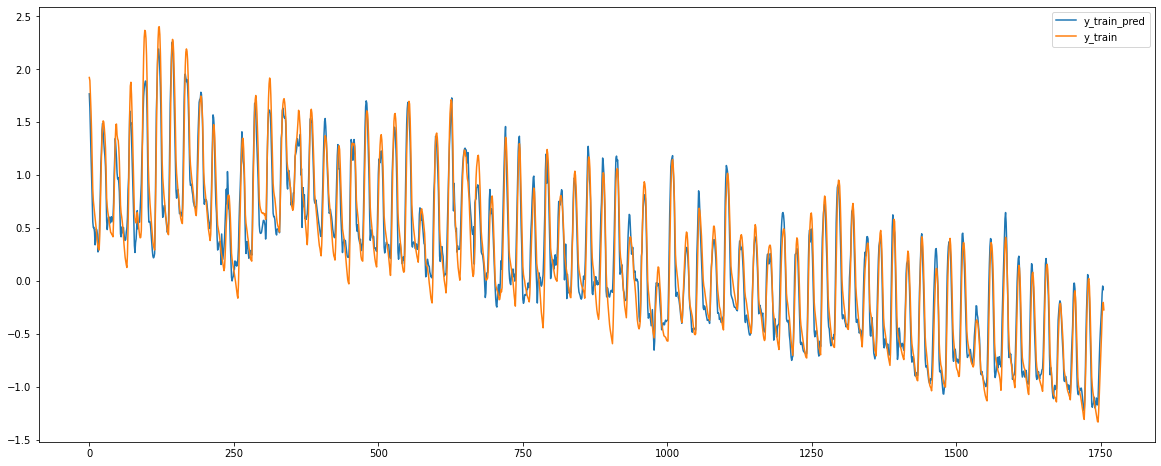

In [47]:
plt.figure(figsize=(20,8))
plt.plot(y2_train_pred[1:] , label ='y_train_pred') #plot the prediction 
plt.plot(y2_train , label ='y_train') # plot the training
plt.legend(loc='upper right')

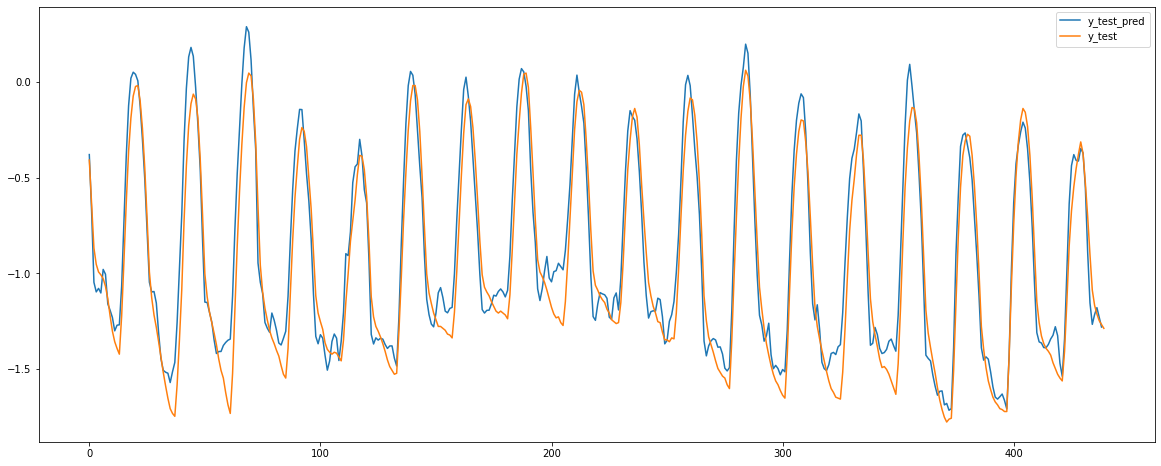

In [48]:
plt.figure(figsize=(20,8))
plt.plot(y2_test_pred[1:] , label ='y_test_pred') #plot the prediction
plt.plot(y2_test , label ='y_test') # plot the test dataset
plt.legend(loc='upper right')

In [49]:
from keras.layers import LSTM

In [52]:
model1 = Sequential()
model1.add(LSTM(units=20, input_shape=(X2_train.shape[1], X2_train.shape[2]))) #input_shape takes time steps and features
#model1.add(LSTM(units=10))#, input_shape=(X2_train.shape[1], X2_train.shape[2])))
#model.add(SimpleRNN(units=10))#, input_shape=(X2_train.shape[1], X2_train.shape[2])))
model1.add(Dense(1))

model1.compile(loss='mean_squared_error', optimizer='adam')

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20)                2160      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,181
Trainable params: 2,181
Non-trainable params: 0
_________________________________________________________________


In [53]:
nb_epoch = 50

model1.fit(X2_train, y2_train, epochs=nb_epoch) # train the models

Epoch 1/50
55/55 [==============================] - 2s 5ms/step - loss: 0.3350
Epoch 2/50
55/55 [==============================] - 0s 5ms/step - loss: 0.1792
Epoch 3/50
55/55 [==============================] - 0s 5ms/step - loss: 0.1408
Epoch 4/50
55/55 [==============================] - 0s 5ms/step - loss: 0.1153
Epoch 5/50
55/55 [==============================] - 0s 5ms/step - loss: 0.0960
Epoch 6/50
55/55 [==============================] - 0s 6ms/step - loss: 0.0797
Epoch 7/50
55/55 [==============================] - 0s 5ms/step - loss: 0.0670
Epoch 8/50
55/55 [==============================] - 0s 5ms/step - loss: 0.0562
Epoch 9/50
55/55 [==============================] - 0s 6ms/step - loss: 0.0477
Epoch 10/50
55/55 [==============================] - 0s 5ms/step - loss: 0.0410
Epoch 11/50
55/55 [==============================] - 0s 5ms/step - loss: 0.0350
Epoch 12/50
55/55 [==============================] - 0s 6ms/step - loss: 0.0303
Epoch 13/50
55/55 [==============================

In [54]:
#y_train_pred_LSTM = model.predict(X_train)
#y_test_pred_LSTM = model.predict(X_test)
y2_train_pred_LSTM = model.predict(X2_train) #train the model 
y2_test_pred_LSTM = model.predict(X2_test) # predict the value of this model in lstm

In [55]:
mean_squared_error(y2_train_pred_LSTM , y2_train) #find the metric use the mean square error

0.017771117048591346

In [56]:
mean_squared_error(y2_test_pred_LSTM , y2_test) #find the mean square error

0.01437995533743103

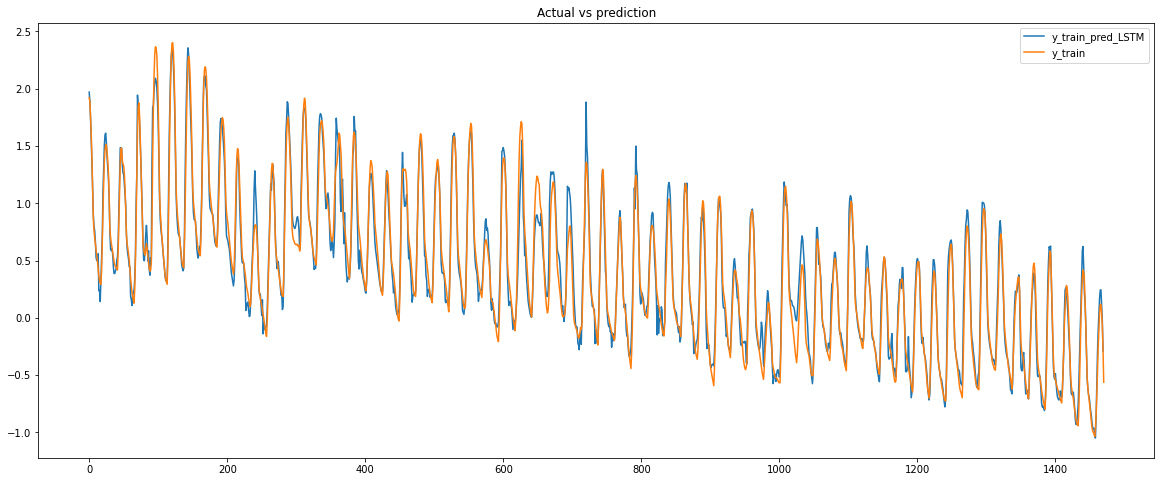

In [32]:
plt.figure(figsize=(20,8))
plt.plot(y2_train_pred_LSTM[1:] , label ='y_train_pred_LSTM') #plot the predicted and train model
plt.plot(y2_train , label ='y_train')
plt.title('Actual vs prediction')
plt.legend(loc='upper right')


In [33]:
import matplotlib.pyplot as plt

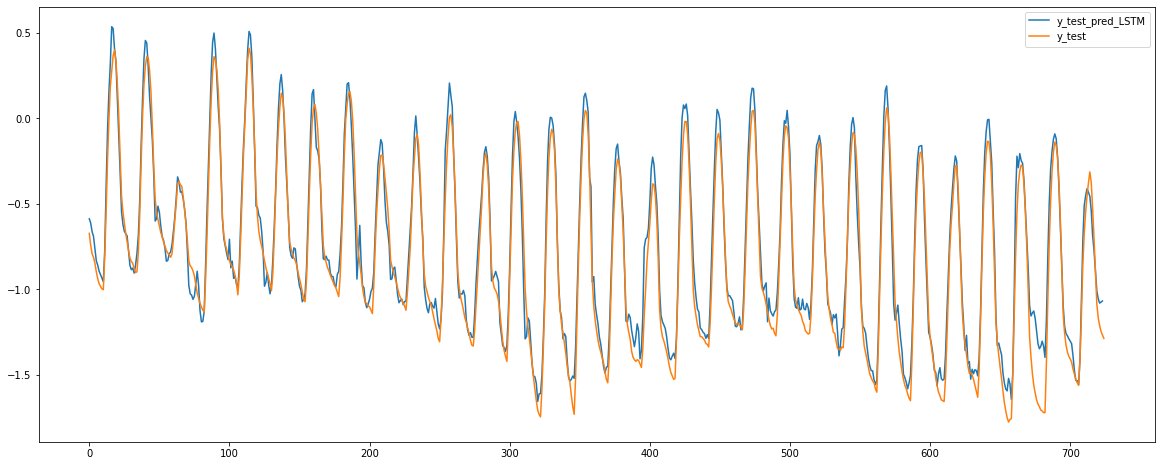

In [34]:
plt.figure(figsize=(20,8))
plt.plot(y2_test_pred_LSTM[1:] , label ='y_test_pred_LSTM')# plot the predicted value and test value
plt.plot(y2_test , label ='y_test')
plt.legend(loc='upper right')